In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

print('done')

done


In [3]:
url ='./dataset/africa_food_prices.csv'

df= pd.read_csv(url)

df

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,NaN
956775,2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,NaN
956776,2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,NaN
956777,2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,NaN


In [14]:
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [4]:
all_cols=['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource']

cols_to_drop=['Unnamed: 0', 'country_id','state_id', 'market_id', 'produce_id','currency_id','pt_id', 'um_unit_id','mp_commoditysource']

In [5]:
df=df.drop(columns=cols_to_drop)

In [6]:
df

,country,state,market,produce,currency,market_type,quantity,month,year,price
0,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,4,2015,90.0000
1,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,5,2015,96.0000
2,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,6,2015,96.0000
3,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,7,2015,83.0000
4,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,Beans (sugar) - Retail,ZWL,Retail,KG,6,2021,233.3333
956775,Zimbabwe,Midlands,Mbilashaba,Toothpaste - Retail,ZWL,Retail,100 ML,6,2021,112.5000
956776,Zimbabwe,Midlands,Mbilashaba,Laundry soap - Retail,ZWL,Retail,KG,6,2021,114.0000
956777,Zimbabwe,Midlands,Mbilashaba,Handwash soap - Retail,ZWL,Retail,250 G,6,2021,59.5000


In [18]:
df['market_type'].unique()

array(['Retail', 'Wholesale', 'Producer'], dtype=object)

In [7]:
market_type= df.groupby('market_type')
market_type.first()

,country,state,market,produce,currency,quantity,month,year,price
market_type,,,,,,,,,
Producer,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,MGA,KG,4,2011,950.0
Retail,Algeria,Alger,Algiers,Rice - Retail,DZD,KG,4,2015,90.0
Wholesale,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,KG,1,2002,145.0


In [8]:
Wholesale_market_type = df[df['market_type'] == 'Wholesale']

In [9]:
Wholesale_market_type

,country,state,market,produce,currency,market_type,quantity,month,year,price
3065,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,KG,1,2002,145.00
3066,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,KG,1,2003,106.00
3067,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,KG,2,2003,107.50
3068,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,KG,3,2003,95.00
3069,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,KG,4,2003,95.00
...,...,...,...,...,...,...,...,...,...,...
902012,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,KG,7,2018,1062.50
902013,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,KG,8,2018,910.00
902014,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,KG,9,2018,900.00
902015,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,KG,10,2018,983.33


In [10]:
df.columns

Index(['country', 'state', 'market', 'produce', 'currency', 'market_type',
       'quantity', 'month', 'year', 'price'],
      dtype='object')

In [11]:
Wholesale_market_type
Wholesale_market_type[['country','state', 'produce', 'year','quantity', 'month','price' ]]

,country,state,produce,year,quantity,month,price
3065,Benin,Alibori,Maize - Wholesale,2002,KG,1,145.00
3066,Benin,Alibori,Maize - Wholesale,2003,KG,1,106.00
3067,Benin,Alibori,Maize - Wholesale,2003,KG,2,107.50
3068,Benin,Alibori,Maize - Wholesale,2003,KG,3,95.00
3069,Benin,Alibori,Maize - Wholesale,2003,KG,4,95.00
...,...,...,...,...,...,...,...
902012,Uganda,Lira,Plantains - Wholesale,2018,KG,7,1062.50
902013,Uganda,Lira,Plantains - Wholesale,2018,KG,8,910.00
902014,Uganda,Lira,Plantains - Wholesale,2018,KG,9,900.00
902015,Uganda,Lira,Plantains - Wholesale,2018,KG,10,983.33


<AxesSubplot:>

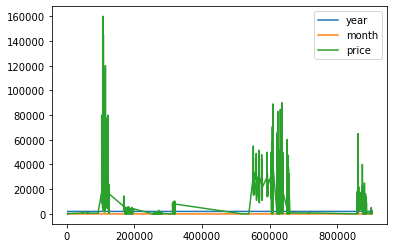

In [12]:
Wholesale_market_type[['country','state', 'produce', 'year','quantity', 'month','price']].plot(kind='line')

<AxesSubplot:xlabel='country'>

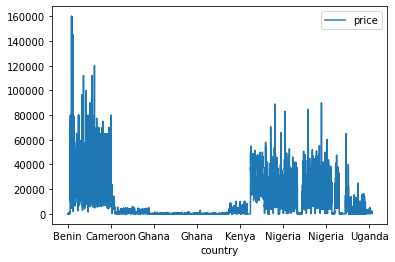

In [13]:

Wholesale_market_type[['country','state', 'produce', 'year','quantity', 'month','price']].plot(kind='line', x='country',y='price')

<AxesSubplot:xlabel='state'>

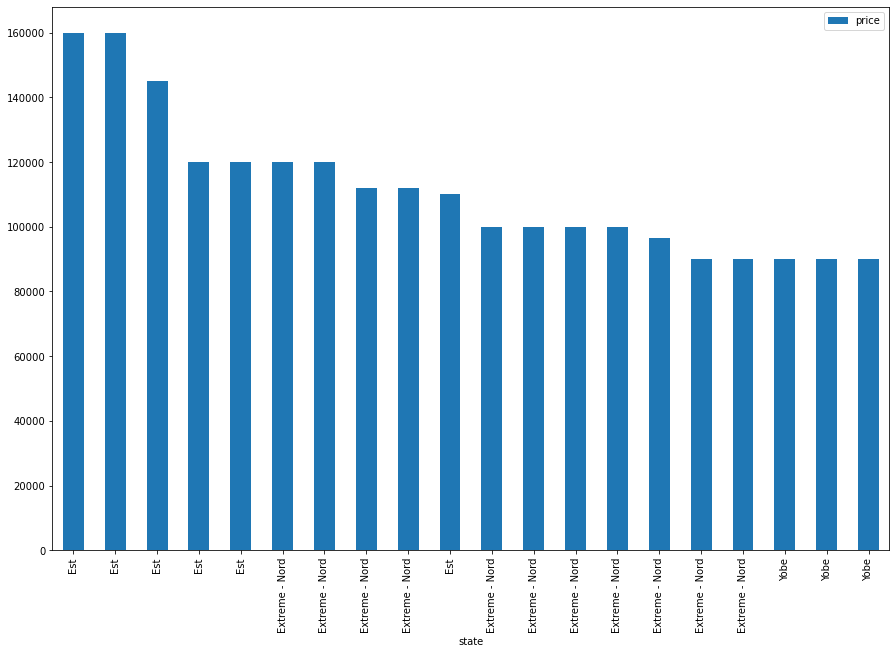

In [33]:
# Top 20 wholesale market type prices
Wholesale_market_type[['country','state', 'produce', 'year','quantity', 'month','price']].nlargest(n=20,columns='price').plot(kind='bar', x='state',y='price',figsize=(15,10))

In [15]:
producer_market_type = df[df['market_type'] == 'Producer']

In [16]:
producer_market_type

,country,state,market,produce,currency,market_type,quantity,month,year,price
384613,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,MGA,Producer,KG,4,2011,950.0
384614,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,MGA,Producer,KG,5,2011,950.0
384615,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,MGA,Producer,KG,6,2011,950.0
384616,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,MGA,Producer,KG,7,2011,950.0
384617,Madagascar,Atsinanana,Atsinanana (Region),Rice (paddy) - Producer,MGA,Producer,KG,8,2011,950.0
...,...,...,...,...,...,...,...,...,...,...
393411,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,MGA,Producer,KG,5,2012,540.0
393412,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,MGA,Producer,KG,6,2012,462.0
393413,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,MGA,Producer,KG,7,2012,500.0
393414,Madagascar,Alaotra Mangoro,Alaotra Mangoro (Region),Rice (paddy) - Producer,MGA,Producer,KG,8,2012,544.0


In [17]:
producer_market_type
producer_market_type[['country','state', 'produce', 'year','quantity', 'month','price' ]]

,country,state,produce,year,quantity,month,price
384613,Madagascar,Atsinanana,Rice (paddy) - Producer,2011,KG,4,950.0
384614,Madagascar,Atsinanana,Rice (paddy) - Producer,2011,KG,5,950.0
384615,Madagascar,Atsinanana,Rice (paddy) - Producer,2011,KG,6,950.0
384616,Madagascar,Atsinanana,Rice (paddy) - Producer,2011,KG,7,950.0
384617,Madagascar,Atsinanana,Rice (paddy) - Producer,2011,KG,8,950.0
...,...,...,...,...,...,...,...
393411,Madagascar,Alaotra Mangoro,Rice (paddy) - Producer,2012,KG,5,540.0
393412,Madagascar,Alaotra Mangoro,Rice (paddy) - Producer,2012,KG,6,462.0
393413,Madagascar,Alaotra Mangoro,Rice (paddy) - Producer,2012,KG,7,500.0
393414,Madagascar,Alaotra Mangoro,Rice (paddy) - Producer,2012,KG,8,544.0


<AxesSubplot:xlabel='state'>

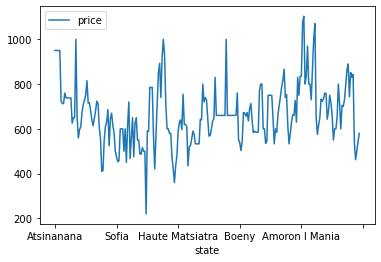

In [18]:
producer_market_type[['country','state', 'produce', 'year','quantity', 'month','price']].plot(kind='line', x='state',y='price')

In [18]:
df.country.unique

<bound method Series.unique of 0          Algeria
1          Algeria
2          Algeria
3          Algeria
4          Algeria
            ...   
956774    Zimbabwe
956775    Zimbabwe
956776    Zimbabwe
956777    Zimbabwe
956778    Zimbabwe
Name: country, Length: 956779, dtype: object>

<AxesSubplot:xlabel='state'>

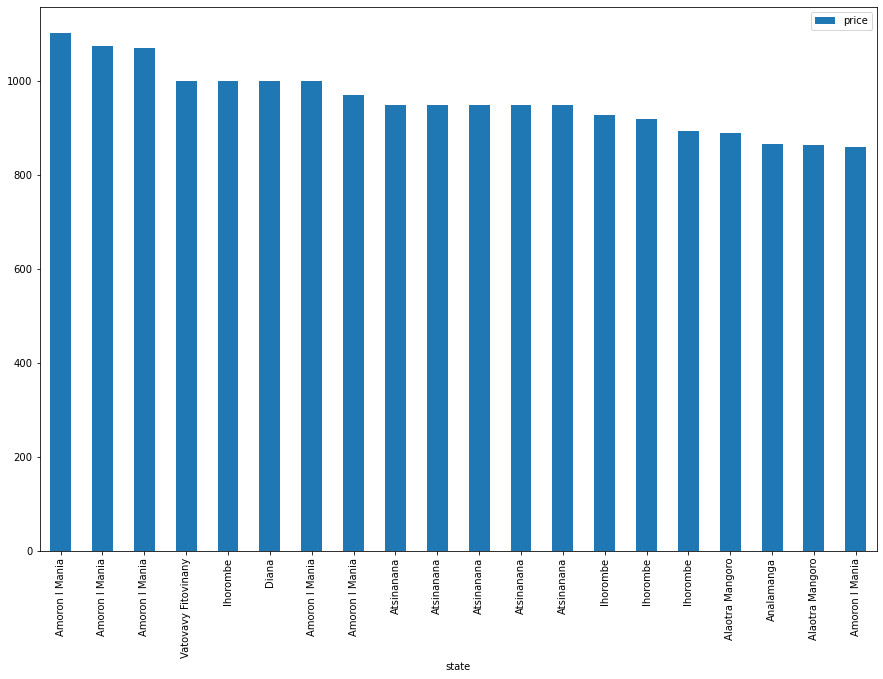

In [31]:
# Top 20 producer maket type prices
producer_market_type[['country','state', 'produce', 'year','quantity', 'month','price']].nlargest(n=20,columns='price').plot(kind='bar',x='state',y='price',figsize=(15,10))